<a href="https://colab.research.google.com/github/Mukesh-mx/student_performance_analysis/blob/main/obstacles_to_scholarly_triumph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing the required libraries:

In [35]:
import numpy as np #linear algebra
import pandas as pd #data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pylab as plt
import seaborn as sns
sns.set(style='ticks')
from subprocess import check_output
import warnings
warnings.filterwarnings("ignore")

# Importing the data:

In [36]:
data=pd.read_csv('./edu_datasets.csv')

# There are no nan values or missing something in the data

In [37]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSatisfaction  

# # These are the features names:

In [38]:
print(data.columns)

Index(['gender', 'NationalITy', 'PlaceofBirth', 'StageID', 'GradeID',
       'SectionID', 'Topic', 'Semester', 'Relation', 'raisedhands',
       'VisITedResources', 'AnnouncementsView', 'Discussion',
       'ParentAnsweringSurvey', 'ParentschoolSatisfaction',
       'StudentAbsenceDays', 'Class'],
      dtype='object')


In [39]:
melt = pd.melt(data,id_vars='Class',value_vars=['raisedhands','VisITedResources','AnnouncementsView'])

As demonstrated by the swarm plot, students who engage in behaviors such as raising their hands, accessing resources, and viewing announcements generally achieve higher levels of success. However, there are instances where students with lower levels of engagement in these behaviors still attain high levels of success.

Text(0.5, 1.0, 'High, middle and low level students')

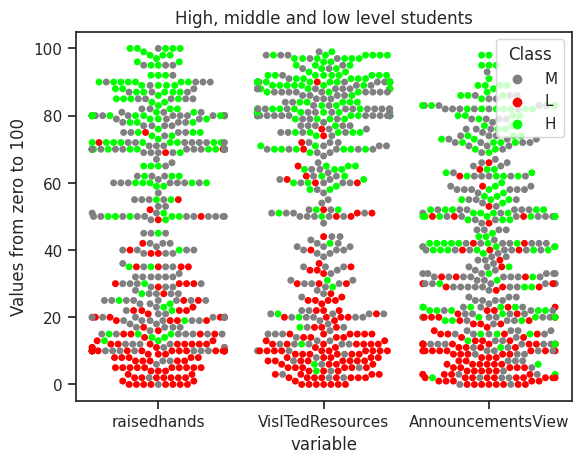

In [40]:
sns.swarmplot(x='variable',y='value',hue='Class' , data=melt,palette={'H':'lime','M':'grey','L':'red'})
plt.ylabel('Values from zero to 100')
plt.title('High, middle and low level students')

To understand why these students, who display high levels of engagement through behaviors like raising their hands, accessing resources, and viewing announcements, are achieving low grades, let's explore the possible causes.

In [41]:
ave_raisedhands = sum(data['raisedhands'])/len(data['raisedhands'])
ave_VisITedResources = sum(data['VisITedResources'])/len(data['VisITedResources'])
ave_AnnouncementsView = sum(data['AnnouncementsView'])/len(data['AnnouncementsView'])
unsuccess = data.loc[(data['raisedhands'] >= ave_raisedhands) & (data['VisITedResources']>=ave_VisITedResources) & (data['AnnouncementsView']>=ave_AnnouncementsView)  & (data['Class'] == 'L')]

# All features of these two students:

In [42]:
print(unsuccess)

    gender NationalITy PlaceofBirth       StageID GradeID SectionID  \
444      M      Jordan       Jordan  MiddleSchool    G-08         A   
445      M      Jordan       Jordan  MiddleSchool    G-08         A   

         Topic Semester Relation  raisedhands  VisITedResources  \
444  Chemistry        F      Mum           75                72   
445  Chemistry        S      Mum           72                76   

     AnnouncementsView  Discussion ParentAnsweringSurvey  \
444                 64          39                   Yes   
445                 66          40                   Yes   

    ParentschoolSatisfaction StudentAbsenceDays Class  
444                     Good            Above-7     L  
445                     Good            Above-7     L  


To determine why these two students are achieving low grades despite high levels of engagement through behaviors such as raising their hands, accessing resources, and viewing announcements, we will first assign numerical values to the Class feature for more precise comparison with other features.

In [43]:
data['numeric_class'] = [1 if data.loc[i,'Class'] == 'L' else 2 if data.loc[i,'Class'] == 'M' else 3 for i in range(len(data))]

In [44]:
# Then start with gender: These two are boy so they can be low level due to it :) Girls say YEEESS but lets look
grade_male_ave = sum(data[data.gender == 'M'].numeric_class)/float(len(data[data.gender == 'M']))
grade_female_ave = sum(data[data.gender == 'F'].numeric_class)/float(len(data[data.gender == 'F']))

While it may appear that gender could be a contributing factor to the low grades of these two students, given that the average performance of females is higher than that of males, this comparison alone cannot fully explain the reasons behind their low grades. It is important to consider other potential factors as well.

#  Now lets look at nationality:

Jordan average: 2.0930232558139537


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'KW'),
  Text(1, 0, 'lebanon'),
  Text(2, 0, 'Egypt'),
  Text(3, 0, 'SaudiArabia'),
  Text(4, 0, 'USA'),
  Text(5, 0, 'Jordan'),
  Text(6, 0, 'venzuela'),
  Text(7, 0, 'Iran'),
  Text(8, 0, 'Tunis'),
  Text(9, 0, 'Morocco'),
  Text(10, 0, 'Syria'),
  Text(11, 0, 'Palestine'),
  Text(12, 0, 'Iraq'),
  Text(13, 0, 'Lybia')])

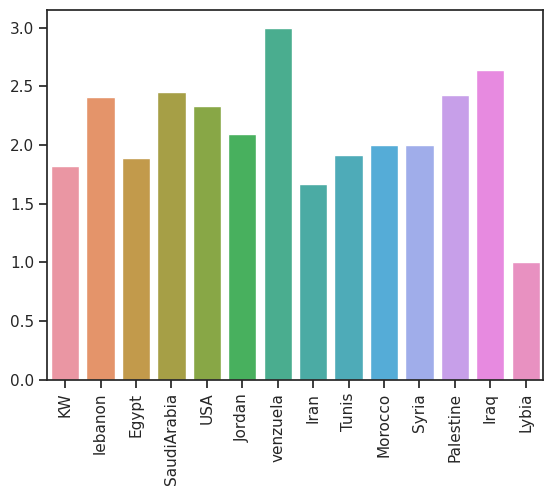

In [45]:
nation = data.NationalITy.unique()
nation_grades_ave = [sum(data[data.NationalITy == i].numeric_class)/float(len(data[data.NationalITy == i])) for i in nation]
ax = sns.barplot(x=nation, y=nation_grades_ave)
jordan_ave = sum(data[data.NationalITy == 'Jordan'].numeric_class)/float(len(data[data.NationalITy == 'Jordan']))
print('Jordan average: '+str(jordan_ave))
plt.xticks(rotation=90)

According to the bar plot, Jordan ranks seventh among the countries with an average of 2.09. This is not a poor performance, and it seems that Jordan may be having a positive influence on the two students in question.

# Now lets look at topic : chemistry

Chemistry average: 2.0833333333333335


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'IT'),
  Text(1, 0, 'Math'),
  Text(2, 0, 'Arabic'),
  Text(3, 0, 'Science'),
  Text(4, 0, 'English'),
  Text(5, 0, 'Quran'),
  Text(6, 0, 'Spanish'),
  Text(7, 0, 'French'),
  Text(8, 0, 'History'),
  Text(9, 0, 'Biology'),
  Text(10, 0, 'Chemistry'),
  Text(11, 0, 'Geology')])

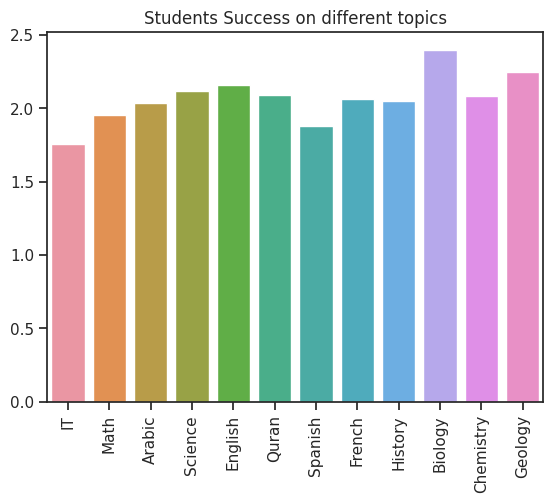

In [46]:
lessons = data.Topic.unique()
lessons_grade_ave=[sum(data[data.Topic == i].numeric_class)/float(len(data[data.Topic == i])) for i in lessons]
ax = sns.barplot(x=lessons, y=lessons_grade_ave)
plt.title('Students Success on different topics')
chemistry_ave = sum(data[data.Topic == 'Chemistry'].numeric_class)/float(len(data[data.Topic == 'Chemistry']))
print('Chemistry average: '+ str(chemistry_ave))
plt.xticks(rotation=90)

As evidenced by its average of 2.08, chemistry does not appear to be the most challenging lesson. In fact, it could be considered one of the easier subjects. So, it is puzzling as to why these two students are performing poorly in this class.

# Lets look at relation with family members:

Text(0.5, 1.0, 'Relation with father or mother affects success of students')

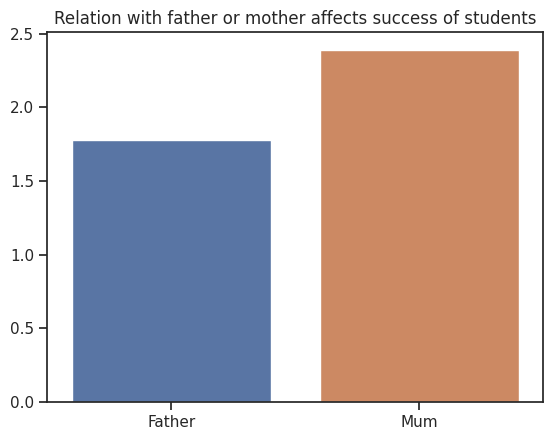

In [47]:
relation = data.Relation.unique()
relation_grade_ave = [sum(data[data.Relation == i].numeric_class)/float(len(data[data.Relation == i])) for i in relation]
ax = sns.barplot(x=relation, y=relation_grade_ave)
plt.title('Relation with father or mother affects success of students')

It seems that having a positive relationship with one's mother has a beneficial effect on these two students' academic success.

# Lets look at how many times the student participate on discussion groups:

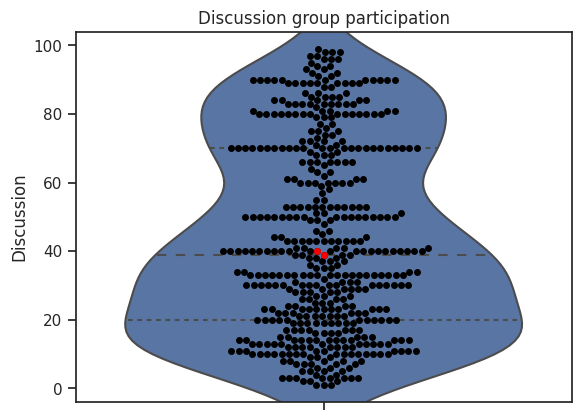

In [48]:
discussion = data.Discussion
discussion_ave = sum(discussion)/len(discussion)
ax = sns.violinplot(y=discussion,split=True,inner='quart')
ax = sns.swarmplot(y=discussion,color='black')
ax = sns.swarmplot(y = unsuccess.Discussion, color='red')
plt.title('Discussion group participation')
plt.savefig('graph.png')

These two students fall below the average level of participation in discussion groups, which is 43. Therefore, increasing their participation in these groups could potentially contribute to their academic success.

Text(0.5, 1.0, 'Absence effect on success')

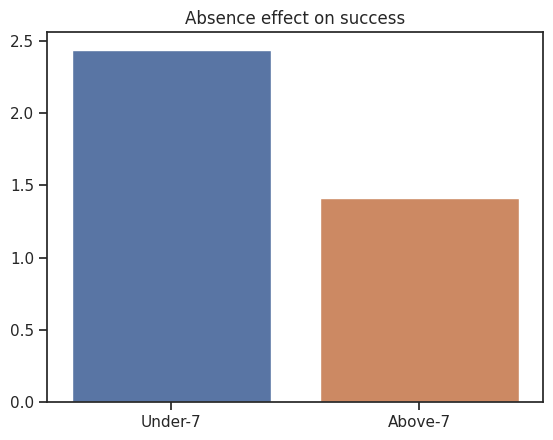

In [49]:
absence_day = data.StudentAbsenceDays.unique()
absense_day_ave = [sum(data[data.StudentAbsenceDays == i].numeric_class)/float(len(data[data.StudentAbsenceDays == i])) for i in absence_day]
ax = sns.barplot(x=absence_day, y=absense_day_ave)
plt.title('Absence effect on success')

##### After analyzing the various factors that could potentially impact the academic success of these two students, it seems that a key factor in their success was their level of absence. As such, it is important for students to consider the balance between attendance and academic performance, as there may be a relationship between the two. However, it is also important to note that other factors, such as participation in discussion groups and the quality of the student-parent relationship, may also play a role in academic success and should not be overlooked.